# RNNs Tutorial with PyTorch on the IMDB Dataset

In this tutorial, we will build a Recurrent Neural Network (CNN) to classify movie reviews as positive or negative using the IMDB dataset.
 
We'll go through the following steps:

1. **Data Loading, Processing, and Augmentation**
2. **Data Exploration**
3. **Model Building**
4. **Model Training**
5. **Model Evaluation**



## 1. Data Loading, Processing, and Augmentation

The IMDB dataset contains 50,000 movie reviews, split into 25,000 reviews for training and 25,000 reviews for testing. The dataset is preprocessed, and each review is encoded as a sequence of word indexes.

### Exercise 1.1 - Data Loading and Processing

1. Load the data from `'../../data/imdb_dataset.zip'` using pandas.
2. Convert the `sentiment` column to a binary label (0 for negative and 1 for positive).
3. Split the dataset into training and test sets (25,000 samples each).
4. Preprocess the `review` column by converting it to lowercase and removing special characters, punctuation and stopwords. Additionally, use a stemming or lemmatization technique.
5. Build a vocabulary of unique words in the training dataset.
6. Tokenize the reviews using the vocabulary, i.e., replace each word with its index in the vocabulary. Note that the reviews should be padded to a fixed length.
7. Create the data loaders for training and test datasets.


In [1]:
import pandas as pd

df = pd.read_csv('../../data/imdb_dataset.zip', compression='zip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=25000, stratify=df["sentiment"], random_state=42)
train.shape


(25000, 2)

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Limpens\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Limpens\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\W', ' ', text)  # Remove non-word/non-whitespace characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    tokens = [word for word in text.split()]   # Tokenize text
    words = [word for word in tokens if word not in stop_words]  # Remove stop words
    words = [stemmer.stem(word) for word in words]  # Perform stemming
    return ' '.join(words)

In [9]:
train["preproc_review"] = train["review"].apply(preprocess_text)
test["preproc_review"] = test["review"].apply(preprocess_text)

In [10]:
train.head()
test.head()

,review,sentiment,preproc_review
16346,If you are a six-year-old boy who's into dinos...,0,six year old boy dinosaur love movi anybodi el...
42137,"When I voted my ""1"" for this film I noticed th...",0,vote film notic peopl vote total vote mean hal...
21867,"While there aren't any talking animals, big la...",1,talk anim big lavish song product number villi...
12577,"Did you ever think, like after watching a horr...",0,ever think like watch horror movi group friend...
25444,"I was expecting to love this movie--film noir,...",0,expect love movi film noir serial killer dark ...


In [16]:
from nltk.tokenize import word_tokenize # type: ignore
def tokenize_text(text):
    return word_tokenize(text)

train["tokens"] = train["preproc_review"].apply(tokenize_text)

In [20]:
top5000 = pd.Series([word for tokens in train ["tokens"] for word in tokens]).value_counts().index[:5000]
top5000

Index(['br', 'movi', 'film', 'one', 'like', 'time', 'good', 'make', 'charact',
       'get',
       ...
       'glu', 'lanc', 'privileg', 'lightn', 'nathan', 'baron', 'abruptli',
       'stylist', 'micheal', 'classi'],
      dtype='object', length=5000)

In [21]:
vocab = {word: idx for idx, word in enumerate(top5000)}

vocab["<unk>"] = 0
vocab["<pad>"] = 1

In [22]:
vocab

{'br': 0,
 'movi': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'time': 5,
 'good': 6,
 'make': 7,
 'charact': 8,
 'get': 9,
 'see': 10,
 'watch': 11,
 'even': 12,
 'stori': 13,
 'would': 14,
 'realli': 15,
 'well': 16,
 'scene': 17,
 'look': 18,
 'show': 19,
 'much': 20,
 'bad': 21,
 'end': 22,
 'great': 23,
 'peopl': 24,
 'love': 25,
 'go': 26,
 'also': 27,
 'first': 28,
 'think': 29,
 'act': 30,
 'play': 31,
 'way': 32,
 'thing': 33,
 'made': 34,
 'could': 35,
 'know': 36,
 'say': 37,
 'plot': 38,
 'seem': 39,
 'actor': 40,
 'work': 41,
 'two': 42,
 'seen': 43,
 'mani': 44,
 'year': 45,
 'come': 46,
 'want': 47,
 'take': 48,
 'never': 49,
 'life': 50,
 'best': 51,
 'littl': 52,
 'tri': 53,
 'ever': 54,
 'man': 55,
 'better': 56,
 'give': 57,
 'still': 58,
 'find': 59,
 'perform': 60,
 'use': 61,
 'someth': 62,
 'feel': 63,
 'part': 64,
 'actual': 65,
 'director': 66,
 'back': 67,
 'lot': 68,
 'real': 69,
 'interest': 70,
 'guy': 71,
 'funni': 72,
 'though': 73,
 'old': 74,
 'cast': 75,
 '

In [23]:
def token_to_idx(tokens):
    return [vocab.get(token,vocab["<unk>"]) for token in tokens]

train["indices"] = train ["tokens"].apply(token_to_idx)
train.head()

,review,sentiment,preproc_review,tokens,indices
3055,Trio's vignettes were insightful and quite enj...,1,trio vignett insight quit enjoy curiou see man...,"[trio, vignett, insight, quit, enjoy, curiou, ...","[3436, 4489, 1540, 96, 78, 1880, 10, 44, 471, ..."
47326,I had never heard of this one before the owner...,0,never heard one owner local dvd rental outlet ...,"[never, heard, one, owner, local, dvd, rental,...","[49, 475, 3, 1450, 536, 179, 1905, 0, 354, 92,..."
48869,This is an excellent but hard to find trippy W...,1,excel hard find trippi world war spi thriller ...,"[excel, hard, find, trippi, world, war, spi, t...","[217, 166, 59, 0, 91, 184, 1850, 539, 0, 849, ..."
48623,"I am a huge fan of big, loud, trashy, complete...",1,huge fan big loud trashi complet stupid action...,"[huge, fan, big, loud, trashi, complet, stupid...","[533, 120, 116, 1198, 3393, 145, 260, 100, 1, ..."
39657,"Easily Lucio Fulci's most respected film, ""Don...",1,easili lucio fulci respect film tortur duckl h...,"[easili, lucio, fulci, respect, film, tortur, ...","[672, 0, 2224, 617, 2, 977, 0, 462, 0, 3470, 5..."


In [24]:
MAX_LENGHT = 300

def pad_truncate(token, max_lenght=MAX_LENGHT):
    if len(token) > max_lenght:
        return token[:max_lenght]
    else:
        return token + [vocab["<pad>"]]*(max_lenght - len(token))

train["pad_trunc"] = train["indices"].apply(pad_truncate)

train.head()

,review,sentiment,preproc_review,tokens,indices,pad_trunc
3055,Trio's vignettes were insightful and quite enj...,1,trio vignett insight quit enjoy curiou see man...,"[trio, vignett, insight, quit, enjoy, curiou, ...","[3436, 4489, 1540, 96, 78, 1880, 10, 44, 471, ...","[3436, 4489, 1540, 96, 78, 1880, 10, 44, 471, ..."
47326,I had never heard of this one before the owner...,0,never heard one owner local dvd rental outlet ...,"[never, heard, one, owner, local, dvd, rental,...","[49, 475, 3, 1450, 536, 179, 1905, 0, 354, 92,...","[49, 475, 3, 1450, 536, 179, 1905, 0, 354, 92,..."
48869,This is an excellent but hard to find trippy W...,1,excel hard find trippi world war spi thriller ...,"[excel, hard, find, trippi, world, war, spi, t...","[217, 166, 59, 0, 91, 184, 1850, 539, 0, 849, ...","[217, 166, 59, 0, 91, 184, 1850, 539, 0, 849, ..."
48623,"I am a huge fan of big, loud, trashy, complete...",1,huge fan big loud trashi complet stupid action...,"[huge, fan, big, loud, trashi, complet, stupid...","[533, 120, 116, 1198, 3393, 145, 260, 100, 1, ...","[533, 120, 116, 1198, 3393, 145, 260, 100, 1, ..."
39657,"Easily Lucio Fulci's most respected film, ""Don...",1,easili lucio fulci respect film tortur duckl h...,"[easili, lucio, fulci, respect, film, tortur, ...","[672, 0, 2224, 617, 2, 977, 0, 462, 0, 3470, 5...","[672, 0, 2224, 617, 2, 977, 0, 462, 0, 3470, 5..."


In [27]:
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def prepare_Data(df):
    x = torch.tensor(df['pad_trunc'].tolist())
    y = torch.tensor(df['sentiment'].tolist())

    return TensorDataset(x, y)

train_data = prepare_Data(train)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

### Exercise 1.2 - Data Augmentation

1. Define a function to replace random words with synonyms from WordNet in the reviews.
2. Augment the training dataset by replacing words in a few reviews with synonyms.

Note: Never augment the test dataset. It's essential to evaluate the model on the original data.

In [29]:
import random
from nltk.corpus import wordnet
import nltk

nltk.download('wordnet')

def augment_text(text, max_augment=3):
    tokens = text.split()[:20]
    augmented_tokens = tokens.copy()
    
    for _ in range(max_augment):
        if len(augmented_tokens) > 1:
            rand_idx = random.randint(0, len(augmented_tokens) - 1)
            word = augmented_tokens[rand_idx]
            synonyms = wordnet.synsets(word)
            if synonyms:
                replacement = random.choice(synonyms).lemmas()[0].name()
                augmented_tokens[rand_idx] = replacement
    print(f"Original: {' '.join(tokens)}")
    print(f"Augmented: {' '.join(augmented_tokens)}")
    print('\n\n')
    return ' '.join(augmented_tokens)

# Apply augmentation to training set
train['review'].iloc[:3].apply(lambda x: augment_text(x, max_augment=3))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Limpens\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original: Trio's vignettes were insightful and quite enjoyable. It was curious seeing so many soon to be famous actors when they
Augmented: Trio's vignettes were insightful and quite enjoyable. It embody curious seeing so many soon to be famous actors when they



Original: I had never heard of this one before the owner of my local DVD rental outlet mentioned it to me;
Augmented: I experience never heard of this one before the owner of my local DVD rental outlet mentioned it to me;



Original: This is an excellent but hard to find trippy World War I spy thriller in the inimitable 60's Italian style.
Augmented: This is an excellent but hard to recover trippy World War I spy thriller in the inimitable 60's Italian style.





3055     Trio's vignettes were insightful and quite enj...
47326    I experience never heard of this one before th...
48869    This is an excellent but hard to recover tripp...
Name: review, dtype: object

## 2. Data Exploration

Before training our model, it's essential to explore the data. This helps us understand its distribution and visualize some examples.

### Exercise 2 - Data Exploration
1. Print the number of positive and negative reviews in the training and test datasets.
2. Plot a histogram of the length of reviews in the training and test datasets.
3. Print a few reviews and their corresponding sentiment labels.

In [33]:
sizes = train["tokens"].apply(len)
sizes

3055      68
47326    149
48869     83
48623    159
39657    109
        ... 
21552    424
10610    127
20104    134
35597     69
27491     60
Name: tokens, Length: 25000, dtype: int64

(array([1.8555e+04, 4.8840e+03, 1.1540e+03, 3.7900e+02, 2.2000e+01,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   3. ,  146.9,  290.8,  434.7,  578.6,  722.5,  866.4, 1010.3,
        1154.2, 1298.1, 1442. ]),
 <BarContainer object of 10 artists>)

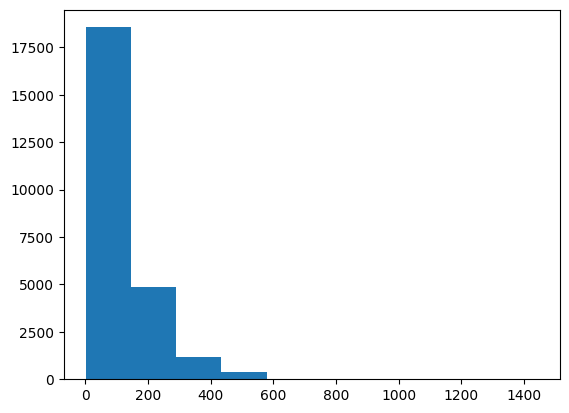

In [34]:
# length of reviews (histogram)
import matplotlib.pyplot as plt

plt.hist(sizes, bins=10, )
# ...

(array([2.124e+03, 8.784e+03, 5.773e+03, 2.861e+03, 1.838e+03, 1.132e+03,
        7.550e+02, 5.450e+02, 3.500e+02, 2.590e+02, 1.810e+02, 1.680e+02,
        1.160e+02, 6.900e+01, 3.300e+01, 7.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   3. ,   43.4,   83.8,  124.2,  164.6,  205. ,  245.4,  285.8,
         326.2,  366.6,  407. ,  447.4,  487.8,  528.2,  568.6,  609. ,
         649.4,  689.8,  730.2,  770.6,  811. ,  851.4,  891.8,  932.2,
         972.6, 1013. , 1053.4, 1093.8, 1134.2, 1174.6, 1215. ]),
 <BarContainer object of 30 artists>)

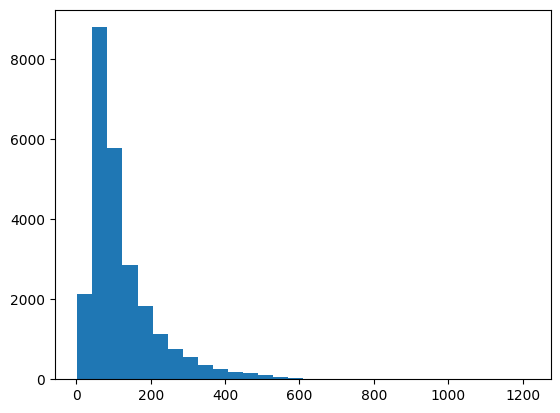

In [ ]:
for i in range(3):
    print(f"review:" {train["review"].iloc[i]}\ Sentiment: )

Review: "Congo" is based on the best-selling novel by Michael Crichton, which I thought lacked Crichton's usual charm, smart characters and punch. Well, sorry to say, but the same goes for the film.<br /><br />Here's the plot:<br /><br />Greed is bad, this simple morality tale cautions. A megalomaniacal C.E.O. (Joe Don Baker) sends his son into the dangerous African Congo on a quest for a source of diamonds large enough and pure enough to function as powerful laser communications transmitter (or is it laser weapons?). When contact is lost with his son and the team, his daughter-in-law (Laura Linney), a former CIA operative and computer-freak, is sent after them. On her quest, she is accompanied by gee-whiz gadgetry and a few eccentric characters (including a mercenary (Ernie Hudson), a researcher with a talking gorilla (Dylan Walsh), and a a nutty Indiana-Jones-type looking for King Solomon's Mines (Tim Curry). After some narrow escapes from surface-to-air missiles and some African wil

## 3. Model Building

Now, we'll define our RNN architecture. A typical RNN consists of an embedding layer, RNN layers, and a fully connected layers.

### Exercise
1. Define a RNN class inheriting from torch.nn.Module.
2. Include one Embedding layer, two LSTM layers, and two Linear layers.

In [ ]:
# ...

RNNModel(
  (embedding): Embedding(5002, 128)
  (rnn): LSTM(128, 64, batch_first=True)
  (rnn2): LSTM(64, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## 4. Model Training

We'll now define the training loop to optimize our model using the binary cross-entropy loss function and the Adam optimizer.

### Exercise
1. Define a function to train the model for a specified number of epochs.
2. Print the training loss after each epoch.

In [ ]:
# ...

Epoch 1/5, Loss: 0.6930, Accuracy: 49.93%
Epoch 2/5, Loss: 0.6912, Accuracy: 49.93%
Epoch 3/5, Loss: 0.6129, Accuracy: 49.93%
Epoch 4/5, Loss: 0.4670, Accuracy: 49.93%
Epoch 5/5, Loss: 0.3798, Accuracy: 49.93%


## 5. Model Evaluation

After training, we need to evaluate our model on the test dataset to understand its performance.

### Exercise
1. Define a function to evaluate the model's accuracy on the test set.
2. Print the accuracy.

In [ ]:
# ...

Test Accuracy: 50.07%
